# Project 3
## Asma Akhtar
### 11/25/2024

# What are the top 5 highly rated gyms with the best sentiments?

In [441]:
import requests
import yelpkeys  
import json
import requests

import pandas as pd

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from operator import itemgetter #getting top 20 words


import urllib
from urllib.parse import quote 

# data visualization imports
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

# natural language processing
import nltk
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from operator import itemgetter


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pakas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [443]:
API_KEY = yelpkeys.api_key

In [445]:
# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'gyms'
DEFAULT_LOCATION = 'Jersey City, NJ'
SEARCH_LIMIT = 20

In [447]:
def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()

In [449]:
def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


In [451]:
response = search(API_KEY,DEFAULT_TERM, DEFAULT_LOCATION)
response

Querying https://api.yelp.com/v3/businesses/search ...


{'businesses': [{'id': 'M_6BIcBpJkMw_ctQa203-A',
   'alias': 'base-jersey-city',
   'name': 'Base',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/aoy9drAMxQH9ayCGL-AeBA/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/base-jersey-city?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ',
   'review_count': 187,
   'categories': [{'alias': 'gyms', 'title': 'Gyms'},
    {'alias': 'bootcamps', 'title': 'Boot Camps'},
    {'alias': 'yoga', 'title': 'Yoga'}],
   'rating': 4.1,
   'coordinates': {'latitude': 40.71876540993267, 'longitude': -74.039929},
   'transactions': [],
   'location': {'address1': '60 Christopher Columbus Dr',
    'address2': None,
    'address3': '',
    'city': 'Jersey City',
    'zip_code': '07302',
    'country': 'US',
    'state': 'NJ',
    'display_address': ['60 Christopher Columbus Dr',
     'Jersey City, NJ 07302']},
   'phone': '+12013322866',
   'displ

## Sentiment Analysis using Textblob and NaiveBayes Analyzer 

In [454]:
# Ensure 'businesses' is in the response before proceeding
if 'businesses' in response:
    reviews_data = []
    for business in response['businesses']:
        print(f"Business Name: {business['name']}")  # Print business name
        print(f"Rating: {business['rating']}")    # print the business rating 
        print(f"Review Count: {business['review_count']}")    #print the number of reviews for the business
        print("Reviews:")

        # # Prepare the path to query reviews for the current business using the business ID
        BUS_REVIEW = f'/v3/businesses/{business["id"]}/reviews'
        reviews = request(API_HOST, BUS_REVIEW, API_KEY)  # # Call the request function to get reviews from Yelp API

        # Check if the 'reviews' key is present in the response from the reviews query
        if 'reviews' in reviews:
            
            # Loop through each review of the business
            for review in reviews['reviews']:
                review_text = review['text']
                print(f" - {review_text}") #  Print the review text with a dash for clarity

                # Sentiment analysis using TextBlob
                blob = TextBlob(review_text)
                sentiment_textblob = blob.sentiment.polarity
                sentiment_textblob_label = "Neutral"
                if sentiment_textblob > 0:
                    sentiment_textblob_label = "Positive"   # If polarity > 0, it's positive sentiment
                elif sentiment_textblob < 0:
                    sentiment_textblob_label = "Negative"    # If polarity < 0, it's negative sentiment

                # Sentiment analysis using NaiveBayesAnalyzer
                naive_blob = TextBlob(review_text, analyzer=NaiveBayesAnalyzer())   # Create a TextBlob object using NaiveBayesAnalyzer
                naive_sentiment = naive_blob.sentiment.classification      # Get the sentiment classification from NaiveBayesAnalyzer

                # Storing the results in reviews_data
                reviews_data.append({
                    'Business Name': business['name'],   # Store the business name
                    'Review': review_text,    # Store the review text
                    'Sentiment (TextBlob)': sentiment_textblob_label,   # Store the sentiment label from TextBlob
                    'Sentiment (NaiveBayesAnalyzer)': naive_sentiment     Store the sentiment label from NaiveBayesAnalyzer
                })
else:
    print("No businesses found.")




Business Name: Base
Rating: 4.1
Review Count: 187
Reviews:
Querying https://api.yelp.com/v3/businesses/M_6BIcBpJkMw_ctQa203-A/reviews ...
 - Stepping into this gym feels like entering a sanctuary of wellness and vitality. From the state-of-the-art equipment to the motivating atmosphere, every...
 - I like to do periodic reviews of BASE (gym) at 60 Christopher Columbus Drive in Jersey City, NJ. What better day to do a review than on the day following a...
 - Ultimately  the amenities are not worth the cost of membership. Classes fill quickly and machines are often taken during rush hour on weekdays. On weekends...
Business Name: Four Fitness
Rating: 4.9
Review Count: 54
Reviews:
Querying https://api.yelp.com/v3/businesses/8cicyQ8j8YETAeOTcLqXKg/reviews ...
 - It is a boutique gym that is a hidden gem in the Hamilton Park area. As a retired natural heavyweight bodybuilder, my gym is my temple and I like this place...
 - A small, comforting gym that has everything you need! I used to work

In [455]:
# After sentiment analysis, printing the review text with space between reviews
print("\nReviews Text :")
for review in reviews_data:
    print(f"Review: {review['Review']}")
    print(f"Sentiment (TextBlob): {review['Sentiment (TextBlob)']}")
    print(f"Sentiment (NaiveBayesAnalyzer): {review['Sentiment (NaiveBayesAnalyzer)']}")
    print("\n")  # Adds a blank line between reviews for clarity


Reviews Text :
Review: Stepping into this gym feels like entering a sanctuary of wellness and vitality. From the state-of-the-art equipment to the motivating atmosphere, every...
Sentiment (TextBlob): Neutral
Sentiment (NaiveBayesAnalyzer): pos


Review: I like to do periodic reviews of BASE (gym) at 60 Christopher Columbus Drive in Jersey City, NJ. What better day to do a review than on the day following a...
Sentiment (TextBlob): Negative
Sentiment (NaiveBayesAnalyzer): neg


Review: Ultimately  the amenities are not worth the cost of membership. Classes fill quickly and machines are often taken during rush hour on weekdays. On weekends...
Sentiment (TextBlob): Positive
Sentiment (NaiveBayesAnalyzer): pos


Review: It is a boutique gym that is a hidden gem in the Hamilton Park area. As a retired natural heavyweight bodybuilder, my gym is my temple and I like this place...
Sentiment (TextBlob): Negative
Sentiment (NaiveBayesAnalyzer): pos


Review: A small, comforting gym that has ev

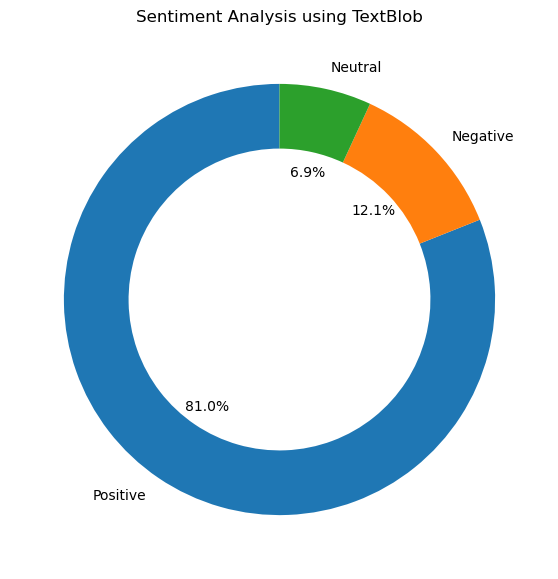

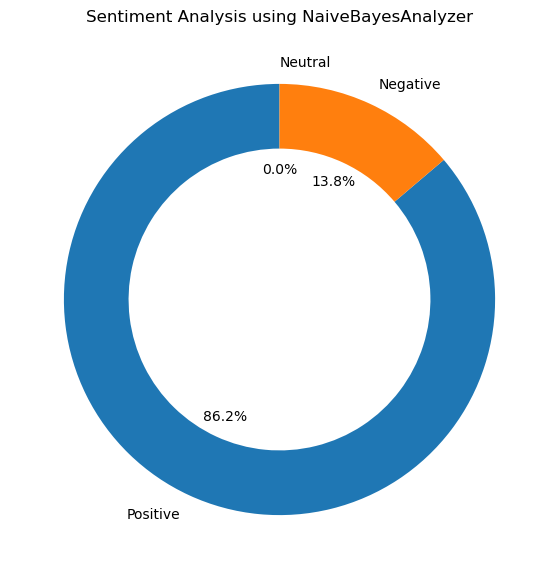

In [456]:
# Count sentiment labels for TextBlob and NaiveBayesAnalyzer
textblob_labels = {'Positive': 0, 'Negative': 0, 'Neutral': 0}
naivebayes_labels = {'Positive': 0, 'Negative': 0, 'Neutral': 0}

for review in reviews_data:
    # TextBlob
    textblob_labels[review['Sentiment (TextBlob)']] += 1
    
    # NaiveBayesAnalyzer: Map 'pos', 'neg', 'neutral' 
    naive_sentiment = review['Sentiment (NaiveBayesAnalyzer)']
    if naive_sentiment == 'pos':
        naivebayes_labels['Positive'] += 1
    elif naive_sentiment == 'neg':
        naivebayes_labels['Negative'] += 1
    elif naive_sentiment == 'neutral':
        naivebayes_labels['Neutral'] += 1

# Create a donut chart for TextBlob
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(list(textblob_labels.values()), labels=textblob_labels.keys(), autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})
ax.set_title('Sentiment Analysis using TextBlob')

# Show the plot
plt.show()

# Create a donut chart for NaiveBayesAnalyzer
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(list(naivebayes_labels.values()), labels=naivebayes_labels.keys(), autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})
ax.set_title('Sentiment Analysis using NaiveBayesAnalyzer')

# Show the plot
plt.show()


In [460]:
# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a Counter to keep track of stopword frequencies
stopword_counts = Counter() 




In [462]:
# Process each review
for review in reviews_data:
    review_text = review['Review']
    
    # Tokenize the review and convert it to lowercase
    words = review_text.lower().split()

    # Count stopwords in the review
    for word in words:
        if word in stop_words:
            stopword_counts[word] += 1

# Print the most common stopwords and their frequency
print("\nMost common stopwords:")
for stopword, count in stopword_counts.most_common(10):
    print(f"{stopword}: {count}")




Most common stopwords:
the: 65
a: 58
and: 55
to: 50
i: 49
is: 30
in: 26
of: 25
for: 23
this: 20


In [464]:
# Process each review
for review in reviews_data:
    # Extract review text
    review_text = review['Review']
    
    # Create a TextBlob object for the review
    blob = TextBlob(review_text)

    # Get words from the review, removing stopwords
    words = [word.lower() for word in blob.words if word.lower() not in stop_words]

    # Count frequency of words that are not in stopwords
    word_counts = Counter(words)

    # Print the length of the words that are not in stopwords
    print(f"Number of words after stopword removal: {len(words)}")

    # Print the words and their frequency counts
    for word, count in word_counts.items():
        print(f" - {word}: {count}")
    print("\n")  # Add a blank line between reviews for clarity

Number of words after stopword removal: 13
 - stepping: 1
 - gym: 1
 - feels: 1
 - like: 1
 - entering: 1
 - sanctuary: 1
 - wellness: 1
 - vitality: 1
 - state-of-the-art: 1
 - equipment: 1
 - motivating: 1
 - atmosphere: 1
 - every: 1


Number of words after stopword removal: 17
 - like: 1
 - periodic: 1
 - reviews: 1
 - base: 1
 - gym: 1
 - 60: 1
 - christopher: 1
 - columbus: 1
 - drive: 1
 - jersey: 1
 - city: 1
 - nj: 1
 - better: 1
 - day: 2
 - review: 1
 - following: 1


Number of words after stopword removal: 15
 - ultimately: 1
 - amenities: 1
 - worth: 1
 - cost: 1
 - membership: 1
 - classes: 1
 - fill: 1
 - quickly: 1
 - machines: 1
 - often: 1
 - taken: 1
 - rush: 1
 - hour: 1
 - weekdays: 1
 - weekends: 1


Number of words after stopword removal: 15
 - boutique: 1
 - gym: 2
 - hidden: 1
 - gem: 1
 - hamilton: 1
 - park: 1
 - area: 1
 - retired: 1
 - natural: 1
 - heavyweight: 1
 - bodybuilder: 1
 - temple: 1
 - like: 1
 - place: 1


Number of words after stopword removal

## Plot for the Top 10 most frequent stopwords

In [467]:
# Get the top 10 most common stopwords
top_stopwords = stopword_counts.most_common(10)


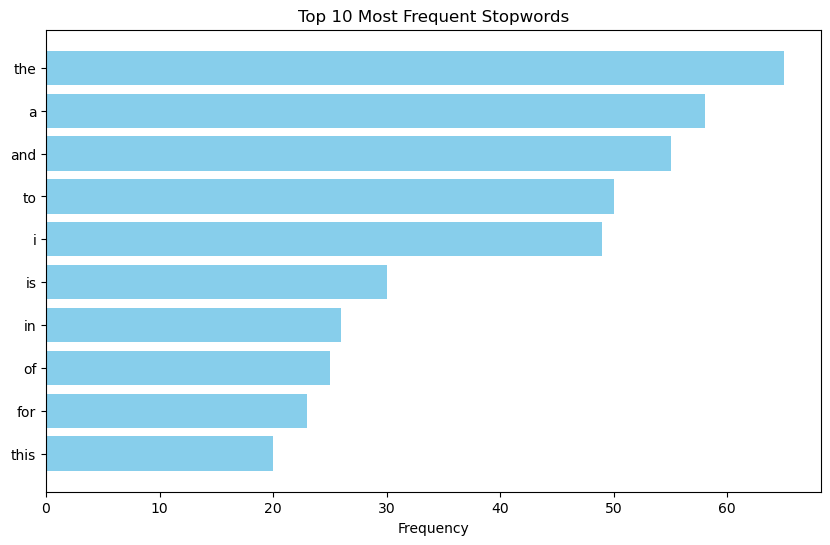

In [469]:
# Extract stopwords and their frequencies for plotting
stopword_list = [stopword for stopword, count in top_stopwords]
count_list = [count for stopword, count in top_stopwords]

# Plot the frequency of the top stopwords
plt.figure(figsize=(10, 6))
plt.barh(stopword_list, count_list, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Most Frequent Stopwords')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()

## Cleaning the reviews 

In [472]:
# Function to clean, tokenize, remove stopwords, and join words
def clean_review(review_text):
    # Initialize the set of stopwords
    stop_words = set(stopwords.words('english')) 
    
    # Remove punctuation and non-alphabetic characters
    review_text = ''.join([char for char in review_text if char.isalpha() or char.isspace()])
    
    # Tokenize the review text (split into words)
    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(review_text.lower())
    
    # Remove stopwords from the tokenized words
    cleaned_words = [word for word in words if word not in stop_words]
    
    # Join the cleaned words back into a single string
    cleaned_review = ' '.join(cleaned_words)
    
    return cleaned_review


# Clean the reviews and store them in a list
cleaned_reviews = [clean_review(review['Review']) for review in reviews_data]

# Print cleaned reviews
for cleaned_review in cleaned_reviews:
    print(cleaned_review)  # Corrected to print the cleaned review, not review_text

stepping gym feels like entering sanctuary wellness vitality stateoftheart equipment motivating atmosphere every
like periodic reviews base gym christopher columbus drive jersey city nj better day review day following
ultimately amenities worth cost membership classes fill quickly machines often taken rush hour weekdays weekends
boutique gym hidden gem hamilton park area retired natural heavyweight bodybuilder gym temple like place
small comforting gym everything need used work walking one day playing great music saw
attend hamilton park location great things say place staff super friendly place clean classes
wonderful staff although air conditioning could use upgrade good solid old reliable gym work fuss show pain gain great place
nice gym decent equipment many muscle headsgymcels enforce hygiene contributes terrible smells bathrooms smells like
primary issue basically size gym limited options fair typically work la fitness much larger gyms mental
ive going gym since started crossfit 

In [474]:
items = blob.word_counts.items()
print(len(items))
items

15


dict_items([('great', 1), ('ambiance', 1), ('and', 1), ('the', 2), ('locker', 1), ('room', 1), ('is', 1), ('amazing', 1), ('though', 1), ('cardio', 1), ('machines', 1), ('could', 1), ('use', 1), ('some', 1), ('fixing', 1)])

In [476]:
items = [item for item in items if item[0] not in stop_words]
len(items)


11

In [478]:
items

[('great', 1),
 ('ambiance', 1),
 ('locker', 1),
 ('room', 1),
 ('amazing', 1),
 ('though', 1),
 ('cardio', 1),
 ('machines', 1),
 ('could', 1),
 ('use', 1),
 ('fixing', 1)]

In [480]:
top_20 = sorted_items[0:21]
top_20

[('great', 1),
 ('ambiance', 1),
 ('locker', 1),
 ('room', 1),
 ('amazing', 1),
 ('though', 1),
 ('cardio', 1),
 ('machines', 1),
 ('could', 1),
 ('use', 1),
 ('fixing', 1)]

## Creating the wordcloud

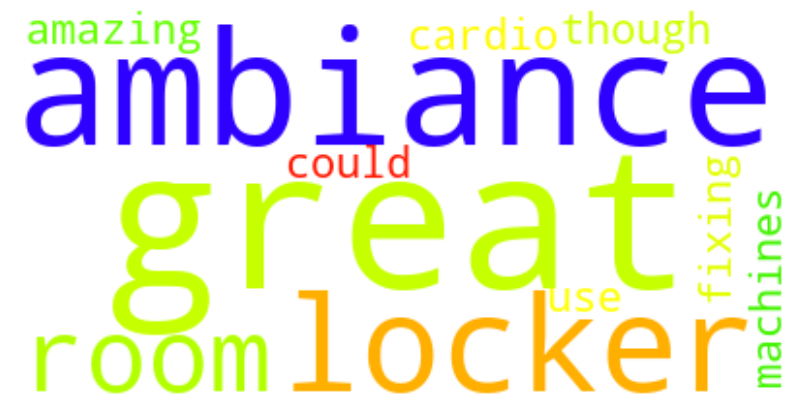

In [483]:
# Get the top 50 most common non-stop words
top_50_words = dict(word_counts.most_common(50))

# Generate a word cloud using the top 50 words
wordcloud = WordCloud(colormap='prism', background_color='white', max_words=50).generate_from_frequencies(top_50_words)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

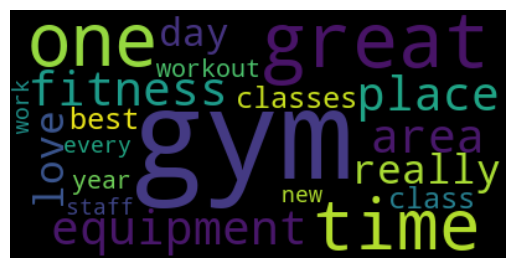

In [485]:
# Combine all the reviews into one single text
text = " ".join([review['Review'] for review in reviews_data])

# Add some custom stopwords
stopwords = set(STOPWORDS)
stopwords.update(["d", "I'll", "'tis'"])

# Generate a WordCloud with stopwords removed
wordcloud = WordCloud(stopwords=stopwords, max_words=20).generate(text)

# Display the WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axis for a cleaner look
plt.show()


# Finding the top 5 gyms based on rating and positive sentiment

In [488]:
# Sort gyms by rating first, then by positive sentiment ratio
sorted_gyms = sorted(gyms_data, key=lambda x: (x['Rating'], x['Positive Sentiment Ratio']), reverse=True)

# Get the top 5 gyms based on rating and positive sentiment ratio
top_5_gyms = sorted_gyms[:5]

# Print out the top 5 gyms
print("\nTop 5 Gyms Based on Rating and Positive Sentiment:")
for idx, gym in enumerate(top_5_gyms, 1):
    print(f"{idx}. {gym['Business Name']}")
    print(f"   Rating: {gym['Rating']}")
    print(f"   Positive Sentiment Ratio: {gym['Positive Sentiment Ratio']:.2f}")


Top 5 Gyms Based on Rating and Positive Sentiment:
1. Heights Fitness
   Rating: 5.0
   Positive Sentiment Ratio: 1.00
2. Ryan Rossman
   Rating: 5.0
   Positive Sentiment Ratio: 1.00
3. Snap Fitness
   Rating: 5.0
   Positive Sentiment Ratio: 1.00
4. Surge Fitness
   Rating: 4.9
   Positive Sentiment Ratio: 1.00
5. Ironbound Performance Athletics
   Rating: 4.9
   Positive Sentiment Ratio: 1.00


## Conclusion: This analysis is based on gym reviews from the Yelp website. We have identified the top five highly rated gyms with the best sentiments. The top gyms are Heights Fitness, Ryan Rossman, Snap Fitness, Surge Fitness, and Ironbound Performance Athletics. All of these gyms have ratings between 4.9 and 5.0.